Problem 1 <br><br>Finding Conditional Probabilities for bathrooms<br>
7 total apartments:


*   5 with 1 bathroom, so 5/7 is probability
*   1 with 1.5 bathroom, so 1/7 is probability

*   1 with 2.5 bathroom, so 1/7 is probability

<br>6 total condos:


*   4 with 1 bathroom, so 4/6 is probability
*   1 with 1.5 bathroom, so 1/6 is probability


*   1 with 2.5 bathroom, so 1/6 is probability

<br>

7 total houses:


*   6 with 1 bathroom, so 6/7 is probability
*   1 with 1.5 bathroom, so 1/7 is probability


<br> Finding Conditional Probability Distribution for Age of Home, only finding mean and variance as it is a continous feature

7 total apartments:


*   Add up ages of all apartments, divide by 7 to get mean
*   Sum of all differences of age of apartment and the mean squared, and then divided by the total number of apartments to get the variance, and then find the square root to get the standard deviation


*   Then the same happens for condos and houses








In [20]:
import numpy as np
import pandas as pd

file_path = 'sample_data_housing.xlsx'
excel_data = pd.ExcelFile(file_path)
test_data = pd.read_excel(excel_data, sheet_name='Test')
conditional_probs = {
    'Construction type': ['Apartment', 'Condo', 'House'],
    'Bathrooms': {
        ('Apartment', 1.0): 0.714,
        ('Apartment', 1.5): 0.143,
        ('Apartment', 2.5): 0.143,
        ('Condo', 1.0): 0.667,
        ('Condo', 1.5): 0.167,
        ('Condo', 2.5): 0.167,
        ('House', 1.0): 0.857,
        ('House', 1.5): 0.143
    },
    '# Garages' : {
        ('Apartment', 0.0): 0.1429,
        ('Apartment', 1.0): 0.4286,
        ('Apartment', 1.5): 0.1429,
        ('Apartment', 2.0): 0.2857,
        ('Condo', 1.0): 0.6667,
        ('Condo', 2.0): 0.3333,
        ('House', 0.0): 0.2857,
        ('House', 1.0): 0.2857,
        ('House', 1.5): 0.1429,
        ('House', 2.0): 0.2857
    },
    '# Rooms' : {
        ('Apartment', 5.0): 0.1429,
        ('Apartment', 6.0): 0.2857,
        ('Apartment', 7.5): 0.2857,
        ('Apartment', 8.0): 0.1429,
        ('Apartment', 9.0): 0.1429,
        ('Condo', 6.0): 0.6667,
        ('Condo', 7.0): 0.1667,
        ('Condo', 10.0): 0.1667,
        ('House', 5.0): 0.1429,
        ('House', 6.0): 0.5714,
        ('House', 7.0): 0.2857
    },
    '# Bedrooms' : {
        ('Apartment', 2.0): 0.1429,
        ('Apartment', 3.0): 0.4286,
        ('Apartment', 4.0): 0.2857,
        ('Apartment', 5.0): 0.1429,
        ('Condo', 3.0): 0.8333,
        ('Condo', 5.0): 0.1667,
        ('House', 2.0): 0.1429,
        ('House', 3.0): 0.7143,
        ('House', 4.0): 0.1429
    },
    'Land Area': {
        'Apartment': {'mean': 6.10, 'std': 3.26},
        'Condo': {'mean': 6.02, 'std': 2.54},
        'House': {'mean': 6.63, 'std': 2.25}
    },
    'Living area': {
        'Apartment': {'mean': 1.51, 'std': 0.70},
        'Condo': {'mean': 1.55, 'std': 0.92},
        'House': {'mean': 1.39, 'std': 0.21}
    },
    'Age of home': {
        'Apartment': {'mean': 38.71, 'std': 14.68},
        'Condo': {'mean': 39.67, 'std': 13.95},
        'House': {'mean': 34.29, 'std': 12.72}
    },
    'Local Price': {
        'Apartment': {'mean': 7.33, 'std': 3.62},
        'Condo': {'mean': 7.42, 'std': 4.61},
        'House': {'mean': 5.76, 'std': 0.57}
    }
}

def gaussian_prob(x, mean, std):
    """Calculate Gaussian probability of x for a given mean and std."""
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

def naive_bayes_classifier(example, conditional_probs):
    classes = conditional_probs['Construction type']
    probabilities = {cls: 1 for cls in classes}

    for feature in example.keys():
        if feature == 'House ID':
            continue

        if feature in conditional_probs:
            for cls in classes:
                if feature in ['Local Price', 'Land Area', 'Living area', 'Age of home']:  # Gaussian features
                    mean = conditional_probs[feature][cls]['mean']
                    std = conditional_probs[feature][cls]['std']
                    probabilities[cls] *= gaussian_prob(example[feature], mean, std)
                elif (cls, example[feature]) in conditional_probs[feature]:  # Categorical features
                    probabilities[cls] *= conditional_probs[feature][(cls, example[feature])]


    total = sum(probabilities.values())
    probabilities = {cls: prob / total for cls, prob in probabilities.items()}

    predicted_class = max(probabilities, key=probabilities.get)
    return probabilities, predicted_class


for index, example in test_data.iterrows():
    probabilities, predicted_class = naive_bayes_classifier(example, conditional_probs)
    print(f"Example {index} - Probabilities: {probabilities}, Predicted Class: {predicted_class}")

Example 0 - Probabilities: {'Apartment': 0.028921610503304843, 'Condo': 0.19780124507392766, 'House': 0.7732771444227675}, Predicted Class: House
Example 1 - Probabilities: {'Apartment': 0.04497692472161858, 'Condo': 0.9550035903362856, 'House': 1.948494209583374e-05}, Predicted Class: Condo
Example 2 - Probabilities: {'Apartment': 0.8648747313359246, 'Condo': 0.1327904464859859, 'House': 0.0023348221780894233}, Predicted Class: Apartment
Example 3 - Probabilities: {'Apartment': 0.006169252470678055, 'Condo': 0.9938307447858649, 'House': 2.7434570139954053e-09}, Predicted Class: Condo
Example 4 - Probabilities: {'Apartment': 0.1319988100840668, 'Condo': 0.8680011899159331, 'House': 2.2758934640348064e-25}, Predicted Class: Condo


Problem 2

Accuracy on training set (default parameters): 1.0
Accuracy on test set (default parameters): 0.4


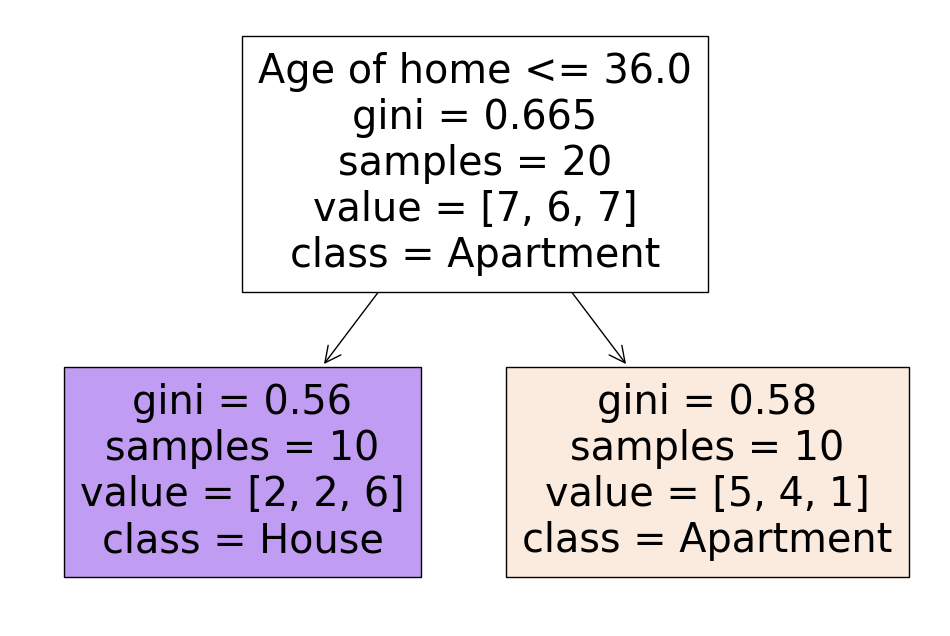

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

train_data = pd.read_excel('sample_data_housing.xlsx', sheet_name='Train')
test_data = pd.read_excel('sample_data_housing.xlsx', sheet_name='Test')

label_encoder = LabelEncoder()
train_data['Construction type'] = label_encoder.fit_transform(train_data['Construction type'])
test_data['Construction type'] = label_encoder.transform(test_data['Construction type'])

X_train = train_data.drop(['House ID', 'Construction type'], axis=1)
y_train = train_data['Construction type']


X_test = test_data.drop(['House ID', 'Construction type'], axis=1)
y_test = test_data['Construction type']


clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

y_pred_train = clf_default.predict(X_train)
y_pred_test = clf_default.predict(X_test)
accuracy_train_default = accuracy_score(y_train, y_pred_train)
accuracy_test_default = accuracy_score(y_test, y_pred_test)
print("Accuracy on training set (default parameters):", accuracy_train_default)
print("Accuracy on test set (default parameters):", accuracy_test_default)

clf_optimal = DecisionTreeClassifier(max_depth=1, random_state=42)
clf_optimal.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(clf_optimal, feature_names=X_train.columns, class_names=label_encoder.classes_, filled=True)
plt.show()




1. <br>
  a. The model was able to classify all instances in the training set perfectly, which here is the first sign of overfitting. <br>
  b. In the test set, the accuracy dropped to 50%, confirming it is indeed overfitting
2.   Restricting the depth of the model helps the model not overfit, and the best depth seems to be a depth of 1, as that is the best accuracy on the test depth, even though it's not as accurate on the testing set.

3. Restricting the data has such a strong effect on the classifier performace because it limits the number of splits in the data, which in turn forces the model to make broader generalizations, which also in turn makes it generalize new data better.

4. Tree shown in output. Age of home is less than 36 so we got to the left subtree which predicts the class House.



Problem 3

Accuracy for k=1: 0.4000
Accuracy for k=2: 0.6000
Accuracy for k=3: 0.6000
Accuracy for k=4: 0.6000
Accuracy for k=5: 0.4000


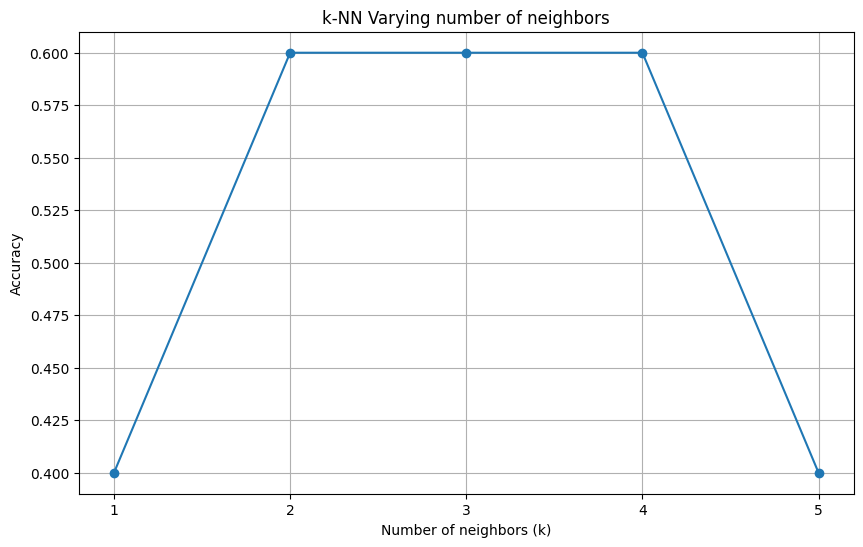

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load training and testing data from separate sheets
train_data = pd.read_excel('sample_data_housing.xlsx', sheet_name='Train')
test_data = pd.read_excel('sample_data_housing.xlsx', sheet_name='Test')

# Preprocessing: Encode the 'Construction type' categorical variable
label_encoder = LabelEncoder()
train_data['Construction type'] = label_encoder.fit_transform(train_data['Construction type'])
test_data['Construction type'] = label_encoder.transform(test_data['Construction type'])

# Define the features and target for training data
X_train = train_data.drop(['House ID', 'Construction type'], axis=1)
y_train = train_data['Construction type']

# Define the features and target for testing data
X_test = test_data.drop(['House ID', 'Construction type'], axis=1)
y_test = test_data['Construction type']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Range of k to try
k_values = range(1, 6)
accuracies = []

# Compute the accuracy for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print accuracies for each k value
for k, accuracy in zip(k_values, accuracies):
    print(f"Accuracy for k={k}: {accuracy:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('k-NN Varying number of neighbors')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
